In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dados_imoveis = pd.read_csv(r'C:\Users\Rafael Tomé\OneDrive\Área de Trabalho\Analises\Portifólio de projetos\Projeto Imobiliaria\imoveis_limpo.csv')

In [3]:
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16664 entries, 0 to 16663
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bairros  16664 non-null  object 
 1   Valores  16664 non-null  float64
 2   Quartos  16664 non-null  float64
 3   Suítes   16664 non-null  float64
 4   Vagas    16664 non-null  float64
 5   Tamanho  16664 non-null  float64
 6   Tipo     16664 non-null  object 
dtypes: float64(5), object(2)
memory usage: 911.4+ KB


In [4]:
dados_imoveis['Tipo'].unique()

array(['Casa', 'Apartamento'], dtype=object)

In [5]:
# Quais bairros tem mais casas a venda?
# Qual casa mais cara?
# Qual a maior casa?
# Qual bairro tem as casas mais caras?
# Preço por mtr² por bairro


# Quais bairros tem mais casas a venda?

In [6]:
# Bairros Organizados

imoveis = dados_imoveis.groupby('Bairros').size()
imoveis_ordenados = imoveis.sort_values(ascending=False)

In [7]:
# Top 10 bairros com mais casas a venda

top_10 = imoveis_ordenados.head(10)

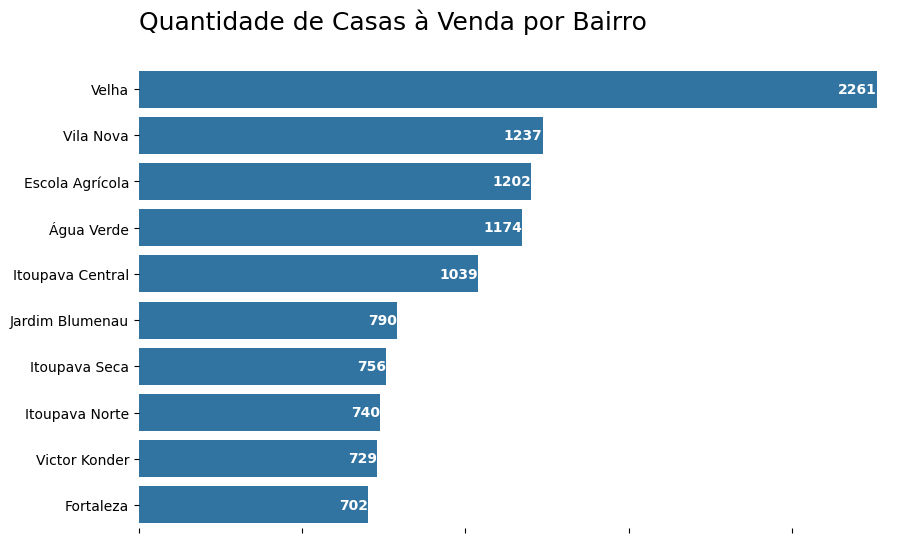

In [8]:
# Gráfico de top 10 bairros

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10.values, y=top_10.index)

ax.set_title('Quantidade de Casas à Venda por Bairro\n', fontsize=18, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left = True, bottom = True)

for i, valor in enumerate(top_10.values):
    ax.text(valor, i, f'{valor}', va='center', fontsize = 10, fontweight = 'bold', ha = 'right', color = 'white' )

# Mostrar o gráfico
plt.show()

In [9]:
# Top 10 bairros por valor a venda
bairros_valor = dados_imoveis.groupby('Bairros')['Valores'].sum('Valor')
bairros_valor_ordenados = bairros_valor.sort_values(ascending=False)
bairros_valor_ordenados

Bairros
Velha               1.909466e+09
Jardim Blumenau     1.616511e+09
Vila Nova           1.184398e+09
Ponta Aguda         1.112450e+09
Escola Agrícola     9.964457e+08
Itoupava Central    9.244744e+08
Itoupava Norte      7.785897e+08
Victor Konder       7.629408e+08
Água Verde          7.484115e+08
Itoupava Seca       7.020560e+08
Centro              5.586829e+08
Garcia              5.060078e+08
Fortaleza           4.306823e+08
Vorstadt            3.727717e+08
Bom Retiro          2.643465e+08
Velha Central       2.337364e+08
Itoupavazinha       2.144144e+08
Salto Norte         1.973814e+08
Tribess             1.763845e+08
Passo Manso         1.631763e+08
Fidelis             1.345024e+08
Salto Weissbach     1.306654e+08
Badenfurt           1.257205e+08
Progresso           1.198091e+08
Fortaleza Alta      1.123481e+08
Salto               8.391442e+07
Vila Formosa        6.976425e+07
Boa Vista           6.817868e+07
Valparaiso          6.069831e+07
Ribeirão Fresco     5.753691e+07
Te

In [10]:
top_10_bairros_valor = bairros_valor_ordenados.head(10)

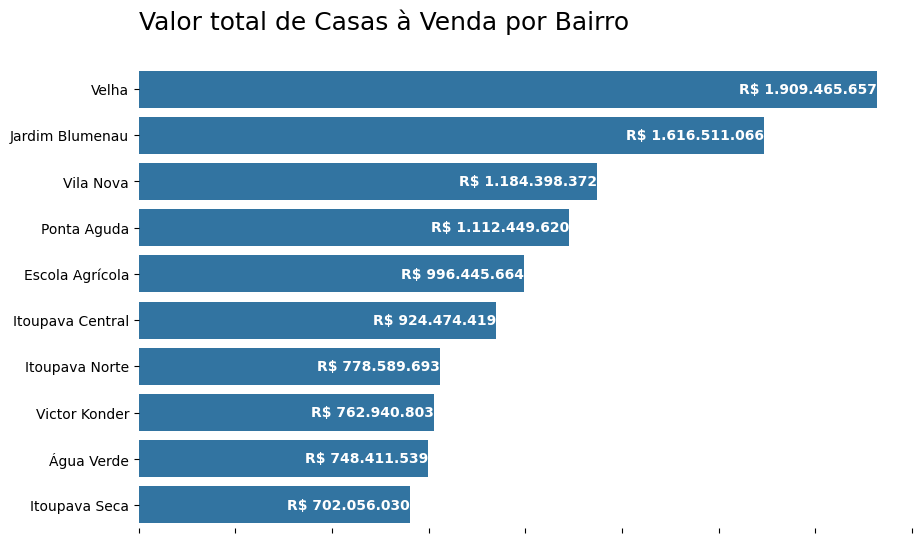

In [11]:
# Gráfico de top 10 bairros

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_10_bairros_valor.values, y=top_10_bairros_valor.index)

ax.set_title('Valor total de Casas à Venda por Bairro\n', fontsize=18, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left = True, bottom = True)

for i, valor in enumerate(top_10_bairros_valor.values):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')  
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= 'white', fontsize=10, fontweight='bold', ha='right', va='center')

# Mostrar o gráfico
plt.show()

# Qual casa mais cara?

In [12]:
valor_casas = dados_imoveis[['Bairros', 'Valores']].sort_values(by='Valores', ascending=False)
valor_casas.head(10)

,Bairros,Valores
4349,Vorstadt,8300000.0
4348,Centro,8000000.0
11347,Centro,8000000.0
10737,Centro,8000000.0
8998,Jardim Blumenau,8000000.0
4346,Jardim Blumenau,7400000.0
4345,Jardim Blumenau,7400000.0
8997,Jardim Blumenau,7400000.0
4347,Jardim Blumenau,7400000.0
15028,Itoupava Norte,7300000.0


# Qual a maior casa?


In [13]:
dados_imoveis.sort_values('Tamanho', ascending=False)

,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo
4349,Vorstadt,8300000.0,5.0,5.0,8.0,991.2,Casa
4941,Badenfurt,3900000.0,4.0,1.0,7.0,980.0,Casa
2447,Vorstadt,2500000.0,6.0,3.0,8.0,976.0,Casa
13950,Progresso,245000.0,3.0,0.0,1.0,962.6,Casa
10234,Fortaleza Alta,3000000.0,4.0,4.0,8.0,951.0,Casa
...,...,...,...,...,...,...,...
6136,Itoupava Seca,258500.0,1.0,0.0,1.0,40.8,Apartamento
6411,Itoupava Seca,354200.0,1.0,0.0,1.0,40.5,Apartamento
13035,Velha,431000.0,1.0,0.0,1.0,40.4,Apartamento
5957,Velha,430281.0,1.0,0.0,1.0,40.4,Apartamento


In [14]:
imoveis_tamanho = dados_imoveis[dados_imoveis['Tamanho'] > 100]
imoveis_tamanho.sort_values('Tamanho', ascending=False)


,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo
4349,Vorstadt,8300000.0,5.0,5.0,8.0,991.2,Casa
4941,Badenfurt,3900000.0,4.0,1.0,7.0,980.0,Casa
2447,Vorstadt,2500000.0,6.0,3.0,8.0,976.0,Casa
13950,Progresso,245000.0,3.0,0.0,1.0,962.6,Casa
10234,Fortaleza Alta,3000000.0,4.0,4.0,8.0,951.0,Casa
...,...,...,...,...,...,...,...
1945,Velha,829000.0,3.0,1.0,2.0,100.4,Apartamento
425,Velha,829000.0,3.0,1.0,2.0,100.4,Apartamento
15962,Velha,350000.0,3.0,1.0,1.0,100.4,Apartamento
15937,Salto Norte,370000.0,2.0,2.0,2.0,100.3,Casa


# Qual bairro tem as casas mais caras?

In [15]:
# Mantendo a média numérica e ordenando
bairros_media = dados_imoveis[['Bairros', 'Valores']]
media_por_bairro = bairros_media.groupby('Bairros')['Valores'].mean()

# Ordenando pelos valores médios numéricos
media_por_bairro_ordenada = media_por_bairro.sort_values(ascending=False)


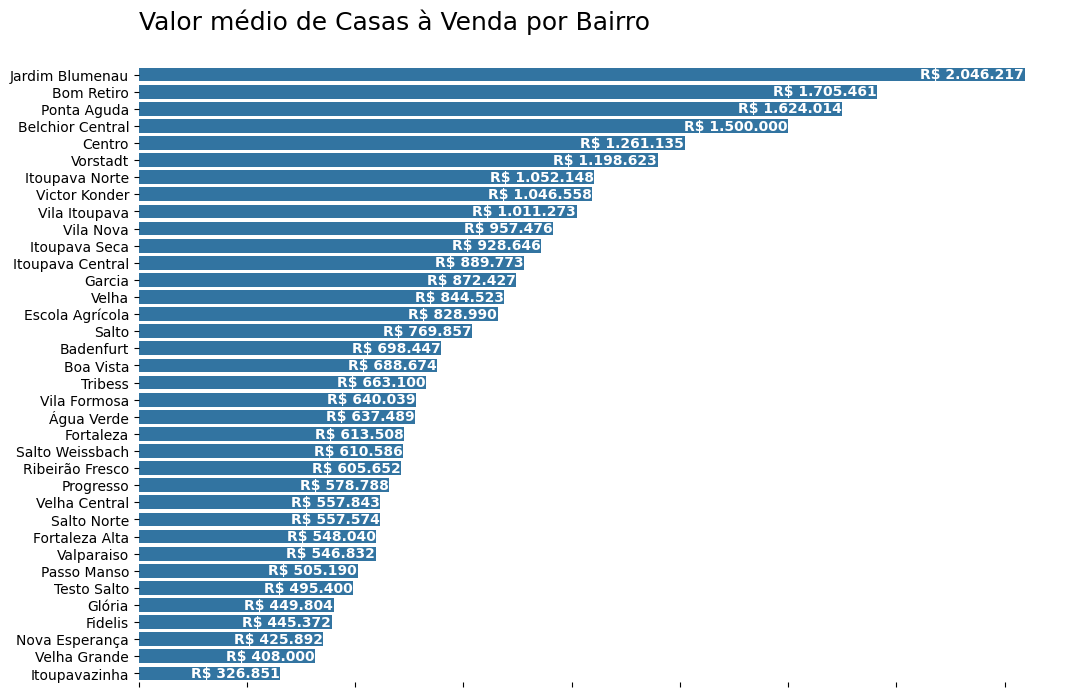

In [16]:
# Gráfico de top 10 bairros

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=media_por_bairro_ordenada, y=media_por_bairro_ordenada.index)

ax.set_title('Valor médio de Casas à Venda por Bairro\n', fontsize=18, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left = True, bottom = True)

for i, valor in enumerate(media_por_bairro_ordenada):
      qtd = f'R$ {valor:,.0f}'.replace(',','.')  
      offset = 1e3  # offset de 1.000
      ax.text(valor - offset, i, qtd, color= 'white', fontsize=10, fontweight='bold', ha='right', va='center')

# Mostrar o gráfico
plt.show()

# Preço por mtr² por bairro

In [17]:
dados_imoveis.sort_values('Tamanho')

,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo
14040,Victor Konder,330000.0,1.0,0.0,1.0,40.3,Apartamento
5957,Velha,430281.0,1.0,0.0,1.0,40.4,Apartamento
13035,Velha,431000.0,1.0,0.0,1.0,40.4,Apartamento
6411,Itoupava Seca,354200.0,1.0,0.0,1.0,40.5,Apartamento
6136,Itoupava Seca,258500.0,1.0,0.0,1.0,40.8,Apartamento
...,...,...,...,...,...,...,...
10234,Fortaleza Alta,3000000.0,4.0,4.0,8.0,951.0,Casa
13950,Progresso,245000.0,3.0,0.0,1.0,962.6,Casa
2447,Vorstadt,2500000.0,6.0,3.0,8.0,976.0,Casa
4941,Badenfurt,3900000.0,4.0,1.0,7.0,980.0,Casa


In [18]:
dados_imoveis['Preço por mtr²'] = (dados_imoveis['Valores'] / dados_imoveis['Tamanho']).round(2)
dados_imoveis

,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo,Preço por mtr²
0,Escola Agrícola,380000.0,2.0,0.0,2.0,80.0,Casa,4750.00
1,Velha,480000.0,3.0,1.0,0.0,131.0,Casa,3664.12
2,Victor Konder,375000.0,2.0,1.0,1.0,124.0,Apartamento,3024.19
3,Salto Weissbach,420000.0,2.0,0.0,2.0,74.0,Casa,5675.68
4,Valparaiso,400000.0,5.0,0.0,3.0,200.0,Casa,2000.00
...,...,...,...,...,...,...,...,...
16659,Itoupavazinha,295000.0,2.0,2.0,2.0,73.9,Casa,3991.88
16660,Itoupava Central,420000.0,2.0,0.0,1.0,86.0,Casa,4883.72
16661,Água Verde,400000.0,2.0,0.0,0.0,95.0,Casa,4210.53
16662,Vila Itoupava,280000.0,3.0,0.0,3.0,150.0,Casa,1866.67


In [19]:
preco_medio_mtr = dados_imoveis.groupby('Bairros')[['Valores', 'Preço por mtr²']].mean().round(2)
preco_medio_mtr = preco_medio_mtr.sort_values('Preço por mtr²', ascending=False)

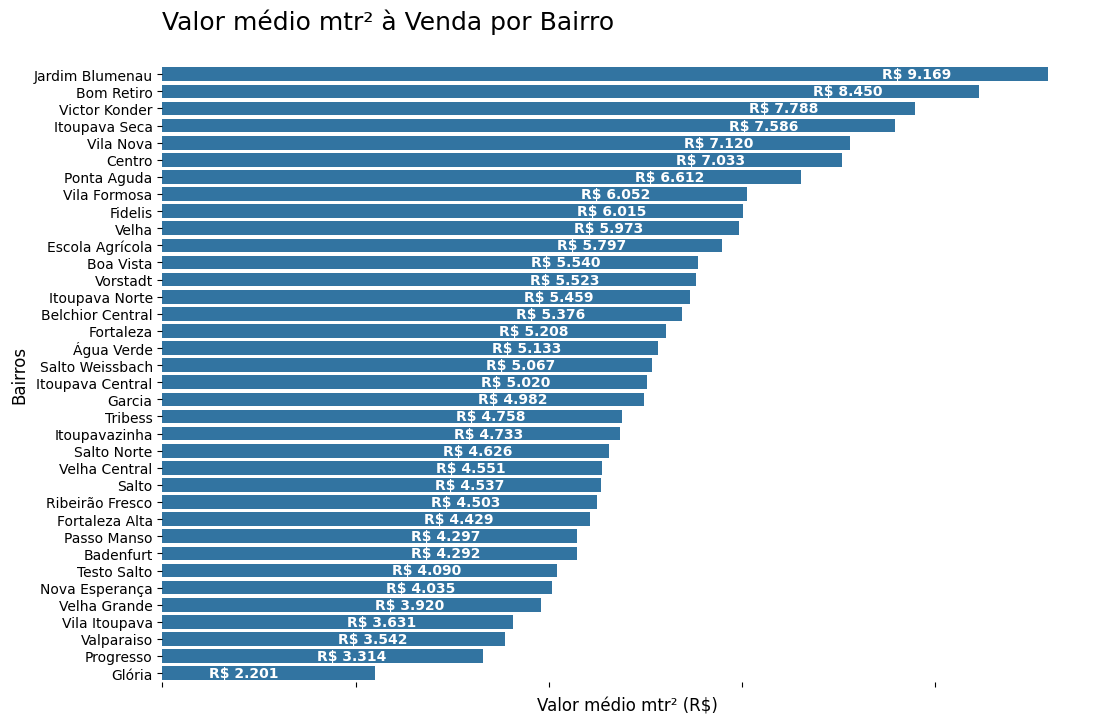

In [20]:
# Selecionando a coluna de valores médios para exibição
preco_mtr = preco_medio_mtr['Preço por mtr²']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=preco_mtr, y=preco_medio_mtr.index)

ax.set_title('Valor médio mtr² à Venda por Bairro\n', fontsize=18, loc='left')
ax.set_xlabel('Valor médio mtr² (R$)', fontsize=12)
ax.set_ylabel('Bairros', fontsize=12)
ax.set_xticklabels([])  # Remover labels do eixo x
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left=True, bottom=True)

# Adicionando os valores formatados no gráfico
for i, valor in enumerate(preco_mtr):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')  # Formatar o valor
    offset = 1e3  # Offset de 1.000
    ax.text(valor - offset, i, qtd, color='white', fontsize=10, fontweight='bold', ha='right', va='center')

# Mostrar o gráfico
plt.show()

# Preço mtr² Casa

In [21]:
preco_medio_mtr_casa = dados_imoveis[dados_imoveis['Tipo'] == 'Casa']
preco_medio_mtr_casa

,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo,Preço por mtr²
0,Escola Agrícola,380000.0,2.0,0.0,2.0,80.0,Casa,4750.00
1,Velha,480000.0,3.0,1.0,0.0,131.0,Casa,3664.12
3,Salto Weissbach,420000.0,2.0,0.0,2.0,74.0,Casa,5675.68
4,Valparaiso,400000.0,5.0,0.0,3.0,200.0,Casa,2000.00
5,Água Verde,685000.0,3.0,1.0,2.0,151.0,Casa,4536.42
...,...,...,...,...,...,...,...,...
16659,Itoupavazinha,295000.0,2.0,2.0,2.0,73.9,Casa,3991.88
16660,Itoupava Central,420000.0,2.0,0.0,1.0,86.0,Casa,4883.72
16661,Água Verde,400000.0,2.0,0.0,0.0,95.0,Casa,4210.53
16662,Vila Itoupava,280000.0,3.0,0.0,3.0,150.0,Casa,1866.67


In [22]:
preco_medio_mtr_casa = preco_medio_mtr_casa.groupby('Bairros')[['Valores', 'Preço por mtr²']].mean().round(2)
preco_medio_mtr_casa = preco_medio_mtr_casa.sort_values('Preço por mtr²', ascending=False)

In [23]:
preco_medio_mtr_casa

,Valores,Preço por mtr²
Bairros,,
Jardim Blumenau,2641600.00,6847.37
Itoupava Seca,1639292.00,6383.23
Centro,2019044.55,5690.35
Victor Konder,1298416.67,5513.60
Vila Nova,1304308.80,5449.76
Belchior Central,1500000.00,5376.34
Ponta Aguda,1322337.69,5332.57
Itoupava Norte,1267591.97,5253.23
Escola Agrícola,1046101.53,5153.08


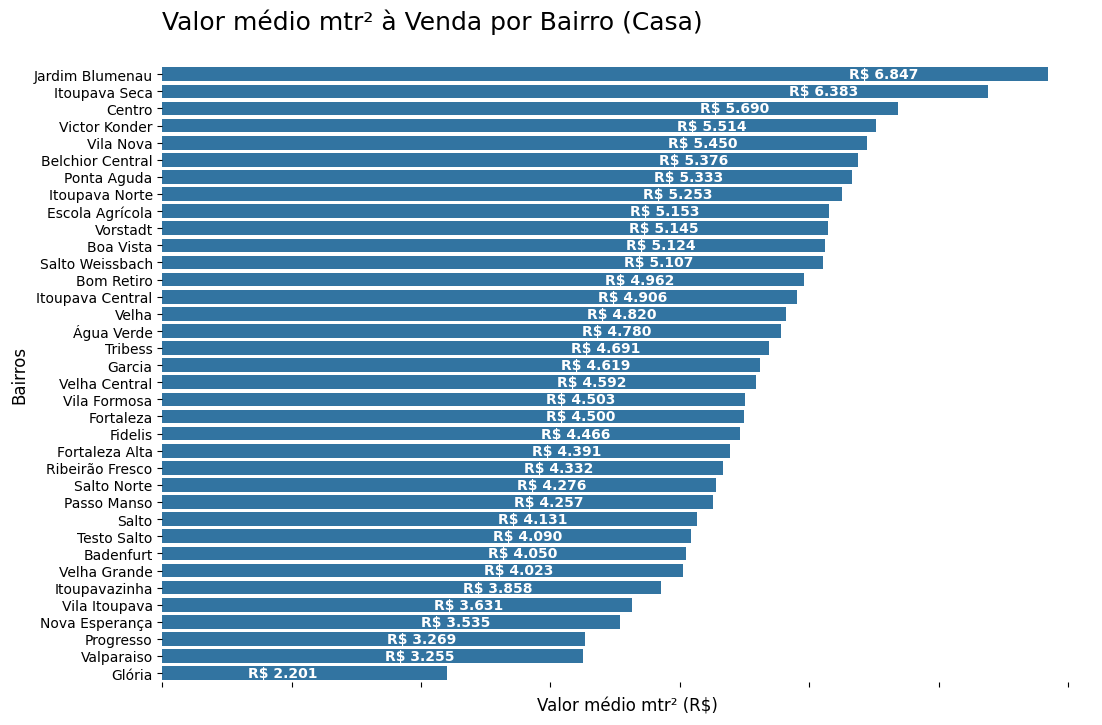

In [24]:
# Selecionando a coluna de valores médios para exibição
preco_mtr = preco_medio_mtr_casa['Preço por mtr²']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=preco_mtr, y=preco_medio_mtr_casa.index)

ax.set_title('Valor médio mtr² à Venda por Bairro (Casa)\n', fontsize=18, loc='left')
ax.set_xlabel('Valor médio mtr² (R$)', fontsize=12)
ax.set_ylabel('Bairros', fontsize=12)
ax.set_xticklabels([])  # Remover labels do eixo x
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left=True, bottom=True)

# Adicionando os valores formatados no gráfico
for i, valor in enumerate(preco_mtr):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')  # Formatar o valor
    offset = 1e3  # Offset de 1.000
    ax.text(valor - offset, i, qtd, color='white', fontsize=10, fontweight='bold', ha='right', va='center')

# Mostrar o gráfico
plt.show()

# Preço mtr² Apartamento

In [25]:
preco_medio_mtr_ap = dados_imoveis[dados_imoveis['Tipo'] == 'Apartamento']
preco_medio_mtr_ap

,Bairros,Valores,Quartos,Suítes,Vagas,Tamanho,Tipo,Preço por mtr²
2,Victor Konder,375000.0,2.0,1.0,1.0,124.0,Apartamento,3024.19
7,Escola Agrícola,550000.0,2.0,1.0,2.0,100.0,Apartamento,5500.00
8,Água Verde,479000.0,3.0,1.0,2.0,80.5,Apartamento,5950.31
15,Velha,430000.0,2.0,0.0,1.0,65.0,Apartamento,6615.38
16,Victor Konder,580000.0,2.0,1.0,2.0,95.0,Apartamento,6105.26
...,...,...,...,...,...,...,...,...
16636,Vila Nova,265000.0,1.0,0.0,1.0,48.0,Apartamento,5520.83
16638,Garcia,270000.0,3.0,0.0,1.0,62.0,Apartamento,4354.84
16639,Centro,1100000.0,3.0,3.0,3.0,122.0,Apartamento,9016.39
16643,Água Verde,285000.0,2.0,0.0,1.0,44.0,Apartamento,6477.27


In [26]:
preco_medio_mtr_ap = preco_medio_mtr_ap.groupby('Bairros')[['Valores', 'Preço por mtr²']].mean().round(2)
preco_medio_mtr_ap = preco_medio_mtr_ap.sort_values('Preço por mtr²', ascending=False)

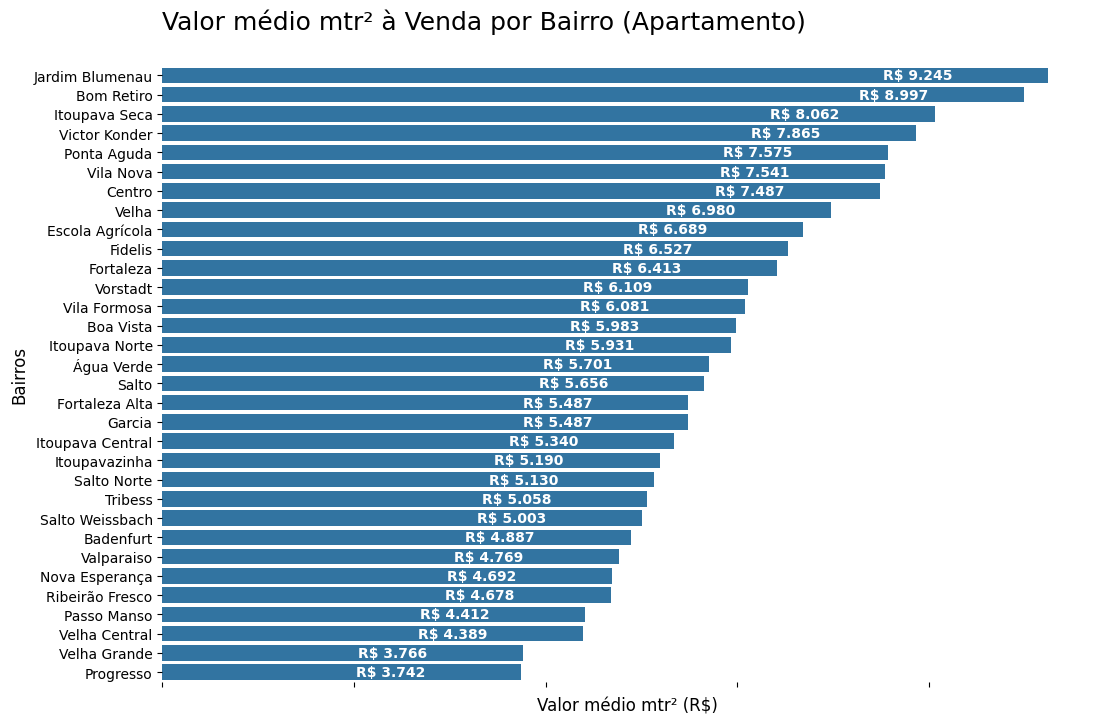

In [27]:
# Selecionando a coluna de valores médios para exibição
preco_mtr = preco_medio_mtr_ap['Preço por mtr²']

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=preco_mtr, y=preco_medio_mtr_ap.index)

ax.set_title('Valor médio mtr² à Venda por Bairro (Apartamento)\n', fontsize=18, loc='left')
ax.set_xlabel('Valor médio mtr² (R$)', fontsize=12)
ax.set_ylabel('Bairros', fontsize=12)
ax.set_xticklabels([])  # Remover labels do eixo x
ax.yaxis.set_tick_params(labelsize=10)
sns.despine(left=True, bottom=True)

# Adicionando os valores formatados no gráfico
for i, valor in enumerate(preco_mtr):
    qtd = f'R$ {valor:,.0f}'.replace(',', '.')  # Formatar o valor
    offset = 1e3  # Offset de 1.000
    ax.text(valor - offset, i, qtd, color='white', fontsize=10, fontweight='bold', ha='right', va='center')

# Mostrar o gráfico
plt.show()

In [29]:
valor_mtr = (dados_imoveis['Valores'] / dados_imoveis['Tamanho']).mean()
print(valor_mtr)

5897.849663037886
